## Bài 1: Phân loại văn bản

#### Mô hình Multinomial Naive Bayes

In [1]:
from __future__ import print_function
from sklearn.naive_bayes import MultinomialNB
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

In [2]:
# train data
d1 = [2,1,1,0,0,0,0,0,0]
d2 = [1,1,0,1,1,0,0,0,0]
d3 = [0,1,0,0,1,1,0,0,0]
d4 = [0,1,0,0,0,0,1,1,1]

In [4]:
train_data = np.array([d1,d2,d3,d4])
label = np.array(['B', 'B', 'B', 'N'])

In [5]:
# test data
d5 = np.array([[2,0,0,1,0,0,0,1,0]])
d6 = np.array([[0,1,0,0,0,0,0,1,1]])

In [6]:
# call MultinomialNB
clf = MultinomialNB()

In [7]:
# training
clf.fit(train_data, label)

MultinomialNB()

In [8]:
# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.89548823 0.10451177]]
Probability of d6 in each class: [[0.29175335 0.70824665]]


#### Mô hình Beurnoulli Naive Bayes

In [14]:
from __future__ import print_function
from sklearn.naive_bayes import BernoulliNB
import numpy as np

In [10]:
# train data
d1 = [2,1,1,0,0,0,0,0,0]
d2 = [1,1,0,1,1,0,0,0,0]
d3 = [0,1,0,0,1,1,0,0,0]
d4 = [0,1,0,0,0,0,1,1,1]

In [12]:
train_data = np.array([d1,d2,d3,d4])
label = np.array(['B', 'B', 'B', 'N'])

In [13]:
# test data
d5 = np.array([[2,0,0,1,0,0,0,1,0]])
d6 = np.array([[0,1,0,0,0,0,0,1,1]])

In [15]:
# call BernouliNB
clf = BernoulliNB()

In [16]:
# training
clf.fit(train_data, label)

BernoulliNB()

In [17]:
# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.76554295 0.23445705]]
Probability of d6 in each class: [[0.16948581 0.83051419]]


## Bài 2: Phân loại email spam 

In [18]:
## packages
from __future__ import division, print_function, unicode_literals
import numpy as np
from scipy.sparse import coo_matrix # for sparse matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score # for evaluating results

In [19]:
# data path and file name
path = 'ex6DataPrepared/'
train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'

In [24]:
nwords = 2500
def read_data(data_fn, label_fn):
    ## read label_fn
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]
    
    ## read data_fn
    with open(path + data_fn) as f:
        content = f.readlines()
    # remove '\n' at the end of each line
    content = [x.strip() for x in content]

    dat = np.zeros((len(content), 3), dtype = int)

    for i, line in enumerate(content):
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])
      
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),shape=(len(label), nwords))
    return (data, label)

In [29]:
(train_data, train_label) = read_data(train_data_fn, train_label_fn)
(test_data, test_label) = read_data(test_data_fn, test_label_fn)

clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print("Accuracy score of Multinomial NB: ", accuracy_score(test_label , y_pred))

Accuracy score of Multinomial NB:  0.9807692307692307


## Bài 3: Phân loại bộ dữ liệu hoa Iris 

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
from PIL import Image

In [33]:
sns.set()
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

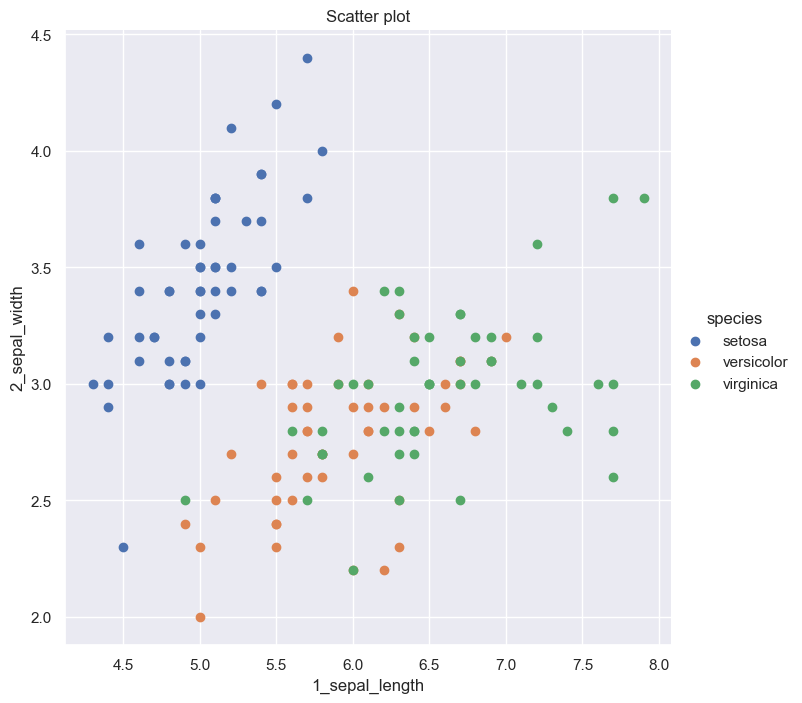

In [34]:
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", height=7).map(plt.scatter,"1_sepal_length", "2_sepal_width", ).add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

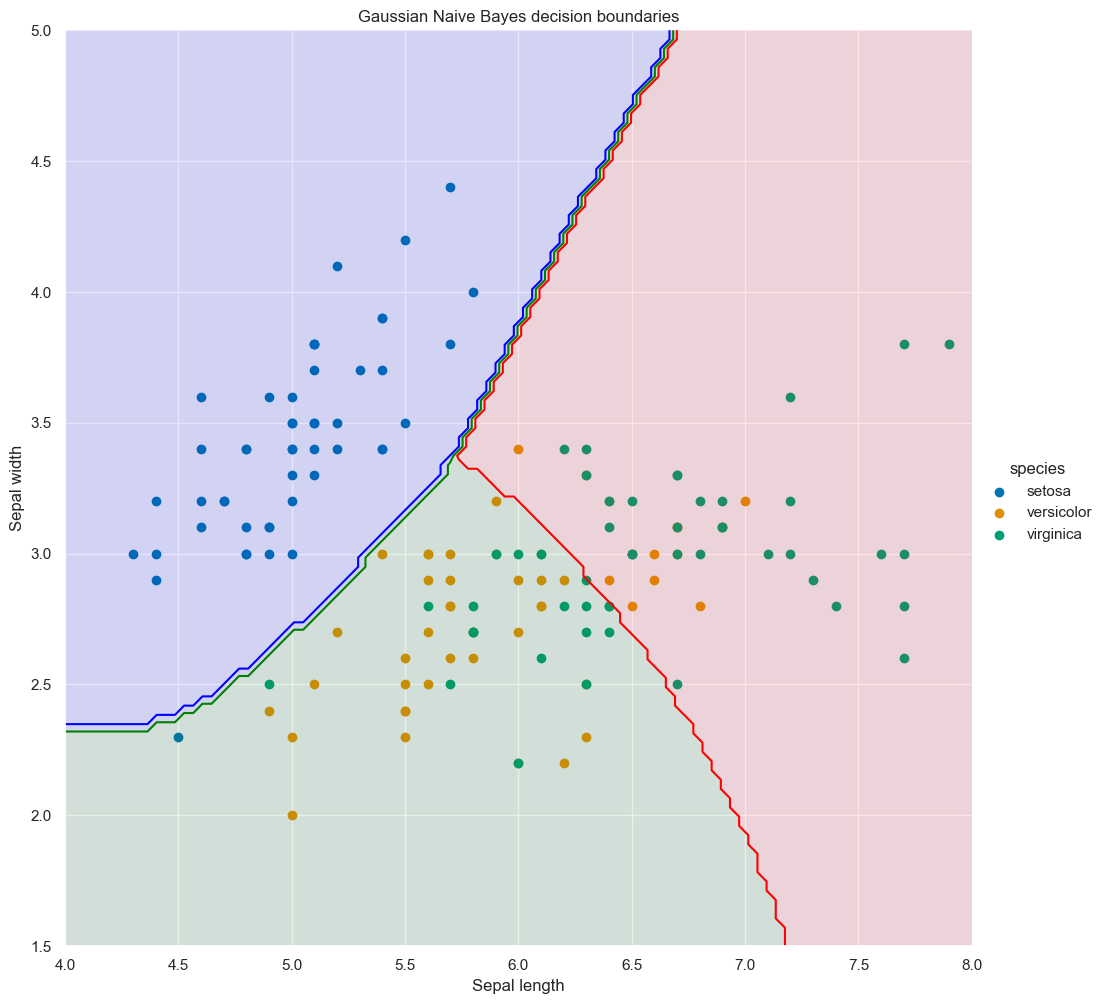

In [37]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] ) 
                 * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                 * pi_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)

def predict_Bayes_class(X,mu_list,sigma_list):
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)

#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)
g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",).add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list)
                for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

## Bài 4: Phân loại bệnh nhân ung thư 

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix

In [67]:
# load the data and split data into 4 part: B_label , B_data , M_label , M_data
path = "datacum.txt"
dt = []
with open(path) as f:
    text = f.readlines()
    for x in text:
        x = x.strip()
        if not x.startswith("#") and x != "":
            dt.append(x)

dat = np.zeros((len(dt), 11), dtype=int)

for i, line in enumerate(dt):
    a = line.split(',')
    dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2]), int(a[3]),
                          int(a[4]), int(a[5]), int(a[6]), int(a[7]), int(a[8]), int(a[9]), int(a[10])])
                                                                                           
# Y_label = ["B" if x[1] == 2 else "M" for x in dat]
# X_data = [[x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10]] for x in dat]

B_label = []
M_label = []
B_data = []
M_data = []
for x in dat:
    if x[1] == 2:
        B_label.append("B")
        B_data.append([x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10]])
    else:
        M_label.append("M")
        M_data.append([x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10]])

In [68]:
# choose 80 data in B_data and 40 data in M_data to test.
Bx_train , Bx_test , By_train , By_test = train_test_split(B_data , B_label , train_size = 80, shuffle= True)
Mx_train , Mx_test , My_train , My_test = train_test_split(M_data , M_label , train_size = 40, shuffle= True)

# buil train set and test set
X_train = Bx_train + Mx_train
X_train = np.array(X_train)
X_test = Bx_test + Mx_test
X_test = np.array(X_test)
Y_train = By_train + My_train
Y_train = np.array(Y_train)
Y_test = By_test + My_test
Y_test = np.array(Y_test)

In [69]:
# using GaussianNB()
gau = GaussianNB()
gau.fit(X_train , Y_train)

cm1 = confusion_matrix(Y_test , gau.predict(X_test))
TP1 = cm1[0,0]
TN1 = cm1[1,1]
FP1 = cm1[0,1]
FN1 = cm1[1,0]

In [70]:
print("Model BernoulliNB ")
print("1. Confusion_matrix:\n",confusion_matrix(Y_test , gau.predict(X_test)))
print("2. Accuracy score: ",accuracy_score(Y_test , gau.predict(X_test)))
print("3. Precision: ", TP1/(TP1 + FP1))
print("4. Recall: ", TP1/(TP1 +FN1) )

Model BernoulliNB 
1. Confusion_matrix:
 [[360  18]
 [  3 198]]
2. Accuracy score:  0.9637305699481865
3. Precision:  0.9523809523809523
4. Recall:  0.9917355371900827
